In [2]:
#****Task 2 & Book_Maker: 1xBet********

import numpy as np
import pandas as pd
from pandas import DataFrame
import csv
from matplotlib import pyplot as plt
bets=pd.read_csv('C:\\Users\\MERT\\Desktop\\Dersler\\Data Mining\\Veriler\\bets.csv')
matches=pd.read_csv('C:\\Users\\MERT\\Desktop\\Dersler\\Data Mining\\Veriler\\matches.csv')

In [3]:
First_Book_Maker=bets[bets.odd_bookmakers=='1xBet'] #first bookmaker is =1xBet
Home_Win_List1=First_Book_Maker[First_Book_Maker.variable=='odd_1'] #home, away and draft win filtered seperately
Away_Win_List1=First_Book_Maker[First_Book_Maker.variable=='odd_2']
Draft_List1=First_Book_Maker[First_Book_Maker.variable=='odd_x']
Premier_League=matches[matches.league_id==148]

In [4]:
data1= pd.merge(Home_Win_List1,Away_Win_List1,on='match_id',how='inner') #firstly merge home and away win for a match
data1_1=pd.merge(data1,Premier_League,on='match_id',how='inner') #secondly with merge premier league match to eliminate others

In [5]:
data1_2=pd.merge(data1_1,Draft_List,on='match_id',how='inner') #finally draft merged to data

In [6]:
data1_2['Prob_Home']=1/(data1_2['value_x'])  #probability of home team win

In [7]:
data1_2['Prob_Away']=1/(data1_2['value_y'])  #probability of away team win

In [8]:
data1_2['Prob_Draft']=1/(data1_2['value'])   #probability of draft

In [9]:
Norm_Home1=(data1_2['Prob_Home'])/(data1_2['Prob_Home']+data1_2['Prob_Away']+data1_2['Prob_Draft']) #normalization
Norm_Away1=(data1_2['Prob_Away'])/(data1_2['Prob_Home']+data1_2['Prob_Away']+data1_2['Prob_Draft']) 
Norm_Draft1=(data1_2['Prob_Draft'])/(data1_2['Prob_Home']+data1_2['Prob_Away']+data1_2['Prob_Draft'])
match_id1=data1_2['match_id']
norm_bet1={'match_id':match_id1,
         'Norm_Home':Norm_Home1,
         'Norm_Away':Norm_Away1,
         'Norm_Draft':Norm_Draft1}


In [10]:
norm_prob1= DataFrame(norm_bet,columns=['match_id','Norm_Home', 'Norm_Away', 'Norm_Draft'])
print(norm_prob1)

     match_id  Norm_Home  Norm_Away  Norm_Draft
0      150842   0.695746   0.109106    0.195148
1      150843   0.604355   0.170075    0.225569
2      150844   0.714071   0.108734    0.177195
3      154513   0.317074   0.384219    0.298707
4      154516   0.690981   0.112781    0.196239
5      154517   0.153262   0.628766    0.217972
6      154518   0.078621   0.779973    0.141405
7      154519   0.343956   0.372728    0.283316
8      155388   0.280334   0.462816    0.256851
9      156200   0.330568   0.363503    0.305929
10     156845   0.601482   0.149682    0.248836
11     156847   0.422750   0.281834    0.295416
12     156848   0.872457   0.037918    0.089625
13     156849   0.377529   0.325025    0.297447
14     156850   0.222787   0.507909    0.269303
15     158697   0.320423   0.359155    0.320423
16     158699   0.093651   0.733834    0.172515
17     158538   0.081889   0.750132    0.167978
18     158539   0.636409   0.132442    0.231149
19     158541   0.181595   0.560350    0

In [11]:
x1=data1_2['Prob_Home']-data1_2['Prob_Away']

In [12]:
y1=data1_2['Prob_Draft']

Text(0.5,1,'1xBet')

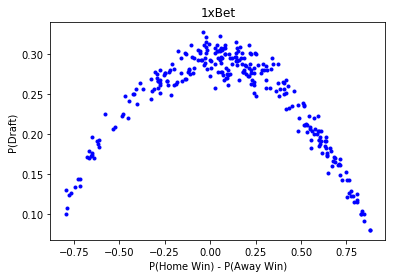

In [13]:
plt.plot(x1,y1,'.',color='blue')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draft)')
plt.title('1xBet')

In [14]:
data1_2['dif']=data1_2['Prob_Home']-data1_2['Prob_Away']

In [15]:
data1_3=pd.merge(data1_2,matches,on='match_id',how='inner') #merging the match score and probabilities with respect to match_id

In [16]:
draft_matches = data1_3[data1_3.match_hometeam_score_y == data1_3.match_awayteam_score_y] #filtering only draft matches
a = np.histogram(draft_matches['dif'], bins=np.arange(-1, 1.1, 0.1))[0]  #defining bins with 0,1 and calculating the draft matches in these bins

In [17]:
b = np.histogram(data_3['dif'], bins=np.arange(-1, 1.1, 0.1))[0] #calculating all matches in these bins
for index in range(len(b)):
    if b[index]==0:                        #preventing 0/0, dont affect the result 
        b[index]=1
    

In [18]:
actual_prob_draft=np.true_divide(a, b)  #real draft match rates


Text(0.5,1,'1xBet')

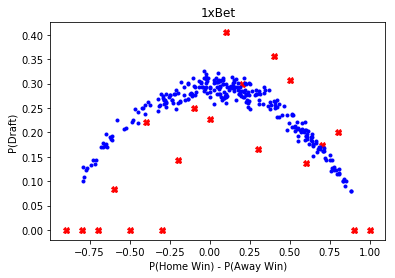

In [19]:
plt.plot(np.arange(-0.9,1.1,0.1),actual_prob_draft,'X',color='red')
plt.plot(x,y,'.',color='blue')
plt.xlabel('P(Home Win) - P(Away Win)')
plt.ylabel('P(Draft)')
plt.title('1xBet')

In [19]:
#Comment:There is no bias in odds representing the probabilities